# Heart Attack Prediction

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/hadi/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Read CSV Data

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Check for NaN Cells

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Domain Expert Info about Data

* سن فرد (Age)
* جنسیت (Sex)
* آیا درد با فعالیت خاصی شروع میشود؟  (exang)
    * 1: Yes
    * 0: NO
* تعداد رگهای اصلی (ca)
    * 0 <= ca <= 3
* نوع درد قفسه سینه (cp)
    * 1: درد مستقیم قلبی
    * 2: درد غیرمسقیم که منجر به حس کردن درد در قلب میشود
    * 3: درد غیر قلبی
    * 4: بدون علایم
* فشارخون در حال استراحت (trtbps)
* چربی خون (chol)
* قند خون ناشتا بالا – دیابت (fbs)
    * 1: دارد
    * 0: ندارد
* نتیجه نوار قلب در حال استراحت (rest_ecg)
    * 0: نرمال
    * 1: بخش ST نوار قلب غیر طبیعی است
    * 2: احتملا یا قطعا بطن چپ بزرگ است
* حداکثر ضربان قلب (thalach)
* شانس حمله قلبی (target)
    * 1: شانس کم
    * 0: شانس زیاد

### Data Frame Box Plot

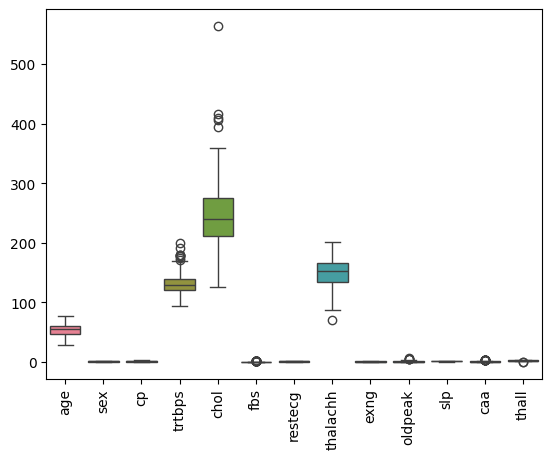

In [4]:
sns.boxplot(df.drop(columns=['output']))
plt.xticks(rotation=90)
plt.show()

### Remove trtbps (فشار خون) Outliers

In [5]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the Price column
trtbps_Q1 = df['trtbps'].quantile(0.25)
trtbps_Q3 = df['trtbps'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
trtbps_IQR = trtbps_Q3 - trtbps_Q1

# Define lower and upper bounds for normal price values
lower_bound = trtbps_Q1 - 1.5 * trtbps_IQR
upper_bound = trtbps_Q3 + 1.5 * trtbps_IQR

# Create a new column to flag outliers
df['trtbps_Outlier'] = ((df['trtbps'] < lower_bound) | (df['trtbps'] > upper_bound))

# Remove the outliers from the original data
df = df[~df['trtbps_Outlier']]

# Drop the 'Price_Outlier' column if you no longer need it
df = df.drop(columns=['trtbps_Outlier'])
print(f"Number of rows after removing outliers: {df.shape[0]}")

Number of rows after removing outliers: 294


### Remove Cholestrol Outliers

In [6]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the Price column
chol_Q1 = df['chol'].quantile(0.25)
chol_Q3 = df['chol'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
chol_IQR = chol_Q3 - chol_Q1

# Define lower and upper bounds for normal price values
lower_bound = chol_Q1 - 1.5 * chol_IQR
upper_bound = chol_Q3 + 1.5 * chol_IQR

# Create a new column to flag outliers
df['chol_Outlier'] = ((df['chol'] < lower_bound) | (df['chol'] > upper_bound))

# Remove the outliers from the original data
df = df[~df['chol_Outlier']]

# Drop the 'Price_Outlier' column if you no longer need it
df = df.drop(columns=['chol_Outlier'])
print(f"Number of rows after removing outliers: {df.shape[0]}")

Number of rows after removing outliers: 289


### After Outliers Removal result

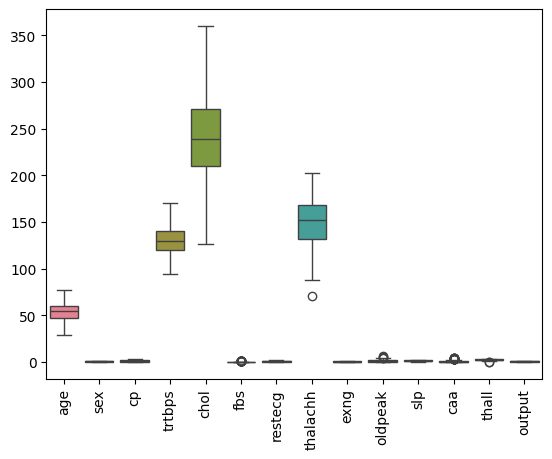

In [7]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

### Corrolation

In [8]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.067879,-0.071751,0.273931,0.170408,0.104535,-0.107596,-0.417800,0.088267,0.207785,-0.162478,0.286499,0.054389,-0.232398
sex,-0.067879,1.000000,-0.091094,-0.002608,-0.109801,0.063626,-0.060817,-0.053168,0.184845,0.136256,-0.056805,0.144450,0.229741,-0.314694
cp,-0.071751,-0.091094,1.000000,0.078114,-0.085026,0.088716,0.066481,0.300585,-0.386005,-0.160075,0.122680,-0.168609,-0.179160,0.428720
trtbps,0.273931,-0.002608,0.078114,1.000000,0.093097,0.122630,-0.148004,-0.065607,0.006435,0.162707,-0.090426,0.117416,0.010032,-0.117390
chol,0.170408,-0.109801,-0.085026,0.093097,1.000000,0.014203,-0.117031,-0.026150,0.081795,-0.009811,0.034806,0.070082,0.074791,-0.109121
fbs,0.104535,0.063626,0.088716,0.122630,0.014203,1.000000,-0.083256,-0.014473,0.005731,-0.005758,-0.056887,0.136719,-0.063856,-0.020281
restecg,-0.107596,-0.060817,0.066481,-0.148004,-0.117031,-0.083256,1.000000,0.064991,-0.100472,-0.045771,0.082709,-0.058089,0.012761,0.150993
thalachh,-0.417800,-0.053168,0.300585,-0.065607,-0.026150,-0.014473,0.064991,1.000000,-0.379481,-0.343535,0.386362,-0.225467,-0.112868,0.434626
exng,0.088267,0.184845,-0.386005,0.006435,0.081795,0.005731,-0.100472,-0.379481,1.000000,0.302020,-0.253740,0.117459,0.213730,-0.427276
oldpeak,0.207785,0.136256,-0.160075,0.162707,-0.009811,-0.005758,-0.045771,-0.343535,0.302020,1.000000,-0.560449,0.215051,0.192886,-0.443917


## Import Sklearn Libraries

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

## Split Train and Test Data

In [10]:
train, test = train_test_split(df, test_size=0.30, random_state=42)
train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1


## Scale Data

In [11]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(train.drop(columns=['output']))
x_test_scaled = scaler.transform(test.drop(columns=['output']))

## Train Logistic Regression Model

In [12]:
model = LogisticRegression()
model.fit(x_train_scaled, train['output'])

LogisticRegression()

### Calculate Model Score

In [13]:
model.score(x_test_scaled, test['output'])

0.8390804597701149

In [14]:
y_hat = model.predict(x_test_scaled)
f1_score(y_hat, test['output'])

0.8627450980392157